<a href="https://colab.research.google.com/github/masrik-dev/Deep-Learning-with-TensorFlow-and-Python/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're going to work with are from the [Food-101 dataset](https://www.kaggle.com/datasets/dansbecker/food-101), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-05-03 13:09:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   169MB/s    in 0.6s    

2025-05-03 13:09:25 (169 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

In [2]:
!ls pizza_steak

test  train


We got `test` and `train` folder

In [3]:
!ls pizza_steak/train/

pizza  steak


Let's check what inside the `steak` directory.

In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May  3 13:09 .
drwxr-xr-x 1 root root 4096 May  3 13:09 ..
drwxr-xr-x 4 root root 4096 May  3 13:09 test
drwxr-xr-x 4 root root 4096 May  3 13:09 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [8]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3162376.jpg']
Image shape: (512, 512, 3)


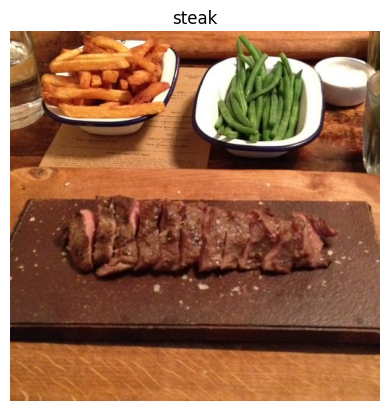

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['2304021.jpg']
Image shape: (384, 512, 3)


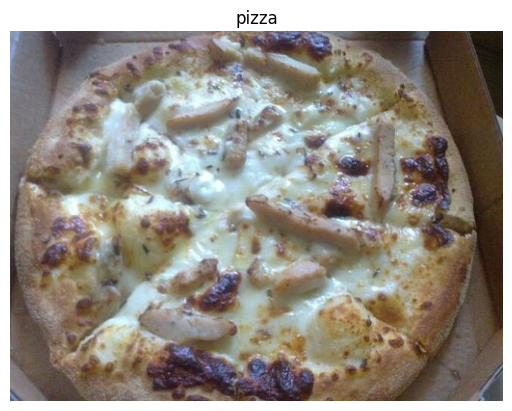

In [11]:
# For pizza
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

array([[[136, 148, 172],
        [133, 148, 171],
        [133, 148, 171],
        ...,
        [ 39,  35,  23],
        [ 36,  32,  20],
        [ 31,  27,  15]],

       [[142, 154, 178],
        [137, 152, 175],
        [134, 149, 172],
        ...,
        [ 38,  34,  22],
        [ 38,  34,  22],
        [ 36,  32,  20]],

       [[141, 153, 179],
        [137, 151, 177],
        [134, 148, 174],
        ...,
        [ 39,  33,  19],
        [ 40,  34,  20],
        [ 41,  35,  21]],

       ...,

       [[ 85,  97, 111],
        [ 92, 105, 122],
        [106, 121, 142],
        ...,
        [ 83,  87,  90],
        [ 87,  92,  95],
        [ 92,  97, 100]],

       [[ 79,  93, 104],
        [ 80,  96, 109],
        [ 86, 103, 123],
        ...,
        [ 78,  82,  85],
        [ 83,  87,  90],
        [ 88,  92,  95]],

       [[ 86, 100, 109],
        [ 84, 100, 113],
        [ 81,  98, 116],
        ...,
        [ 81,  85,  88],
        [ 88,  92,  95],
        [ 94,  98, 101]]], dtype=uint8)
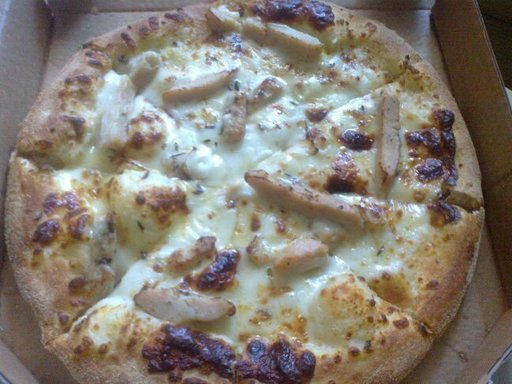

In [12]:
img

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[136, 148, 172],
        [133, 148, 171],
        [133, 148, 171],
        ...,
        [ 39,  35,  23],
        [ 36,  32,  20],
        [ 31,  27,  15]],

       [[142, 154, 178],
        [137, 152, 175],
        [134, 149, 172],
        ...,
        [ 38,  34,  22],
        [ 38,  34,  22],
        [ 36,  32,  20]],

       [[141, 153, 179],
        [137, 151, 177],
        [134, 148, 174],
        ...,
        [ 39,  33,  19],
        [ 40,  34,  20],
        [ 41,  35,  21]],

       ...,

       [[ 85,  97, 111],
        [ 92, 105, 122],
        [106, 121, 142],
        ...,
        [ 83,  87,  90],
        [ 87,  92,  95],
        [ 92,  97, 100]],

       [[ 79,  93, 104],
        [ 80,  96, 109],
        [ 86, 103, 123],
        ...,
        [ 78,  82,  85],
        [ 83,  87,  90],
        [ 88,  92,  95]],

       [[ 86, 100, 109],
        [ 84, 100, 113],
        [ 81,  98, 116],
        ...,
        [ 81,  85,  8

In [14]:
# View the image shape
img.shape # returns width, height, and colour channels

(384, 512, 3)

> 🔑**Note:** As We're know, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Because of that, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (Since 255 is the maximum pixel value)

In [15]:
# Get all the pixel values between 0 & 1.
img/255.

array([[[0.53333333, 0.58039216, 0.6745098 ],
        [0.52156863, 0.58039216, 0.67058824],
        [0.52156863, 0.58039216, 0.67058824],
        ...,
        [0.15294118, 0.1372549 , 0.09019608],
        [0.14117647, 0.1254902 , 0.07843137],
        [0.12156863, 0.10588235, 0.05882353]],

       [[0.55686275, 0.60392157, 0.69803922],
        [0.5372549 , 0.59607843, 0.68627451],
        [0.5254902 , 0.58431373, 0.6745098 ],
        ...,
        [0.14901961, 0.13333333, 0.08627451],
        [0.14901961, 0.13333333, 0.08627451],
        [0.14117647, 0.1254902 , 0.07843137]],

       [[0.55294118, 0.6       , 0.70196078],
        [0.5372549 , 0.59215686, 0.69411765],
        [0.5254902 , 0.58039216, 0.68235294],
        ...,
        [0.15294118, 0.12941176, 0.0745098 ],
        [0.15686275, 0.13333333, 0.07843137],
        [0.16078431, 0.1372549 , 0.08235294]],

       ...,

       [[0.33333333, 0.38039216, 0.43529412],
        [0.36078431, 0.41176471, 0.47843137],
        [0.41568627, 0

## An end-to-end example of **convolutional neural network (CNN)**

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train" # we can copy the path
test_dir = "pizza_steak/test"            # or we can import path like that

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.5895 - loss: 0.6472 - val_accuracy: 0.8120 - val_loss: 0.5618
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.7790 - loss: 0.5202 - val_accuracy: 0.8180 - val_loss: 0.4249
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8145 - loss: 0.4215 - val_accuracy: 0.8540 - val_loss: 0.3796
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.8330 - loss: 0.3714 - val_accuracy: 0.8620 - val_loss: 0.3263
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8623 - loss: 0.3589 - val_accuracy: 0.8520 - val_loss: 0.3541


> 🤔 **Note:** If the cell above takes more than ~12 seconds per epoch to run, we might not be using a GPU accelerator. If we're using a Colab notebook, we can access a GPU accelerator by going to Runtime -> Change Runtime Type -> and select "GPU". After doing so, we might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

**For More Information about CNN:** https://poloclub.github.io/cnn-explainer/

In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Use the same model as `model_1` in different dataset

### **Trying a non-CNN model on our image data**
 First let's use a classification model (previously used in 02 file) for `model_1` dataset. To evaluate that is it going to work or not. Then we will improve it if necessary.

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model we previously used
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.5012 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.4916 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.5050 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.4937 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [19]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

### **Improving our non-CNN model by adding more layers**

Despite having 20x more parameters than our **CNN(`model_1`)**, `model_2` performs terribly... let's try to improve our `model_2`.

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.5625 - loss: 4.3514 - val_accuracy: 0.5240 - val_loss: 2.8642
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.6530 - loss: 1.4134 - val_accuracy: 0.7640 - val_loss: 0.4947
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.6823 - loss: 0.7992 - val_accuracy: 0.7680 - val_loss: 0.4614
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7195 - loss: 0.6092 - val_accuracy: 0.7700 - val_loss: 0.4694
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7527 - loss: 0.5511 - val_accuracy: 0.7860 - val_loss: 0.5132


In [21]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

> **CNN still performs better**

# **Breaking our CNN model down: Becoming one with the data**

> ✍**Note:** We know, trainable parameters as **patterns** of a model can learn from data. Intuitively, we might think that more is better. (And in lots of cases, it is). However, in this case, the difference is that two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns. **A convolutional neural network seeks to sort out and learn the most important patterns in an image.** So, erven though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [22]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here is scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1839025.jpg']
Image shape: (512, 512, 3)
['44449.jpg']
Image shape: (384, 512, 3)


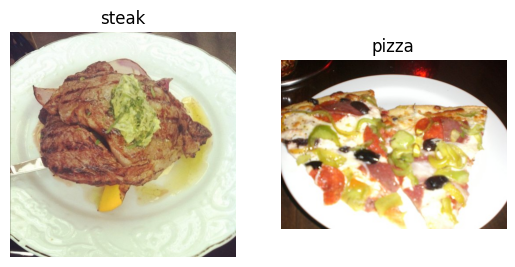

In [23]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

### 2. Preprocess the data (prepare it for a model)

In [24]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

> Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 images at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of our processor (GPU).
2. Trying to learn the patterns in 10,000 images (or more) in one hit could result in the model not being able to learn very well.

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,     # Target directory of images
                                               target_size=(224, 224),  # Target size of images (height, width)
                                               class_mode="binary",     # Type of data we're working with
                                               batch_size=32)           # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = next(train_data) # Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [30]:
images[9]

array([[[0.86274517, 0.68235296, 0.69411767],
        [0.9333334 , 0.7568628 , 0.7843138 ],
        [0.8745099 , 0.70980394, 0.7176471 ],
        ...,
        [0.8705883 , 0.74509805, 0.7568628 ],
        [0.9294118 , 0.77647066, 0.85098046],
        [1.        , 0.82745105, 0.9568628 ]],

       [[0.90196085, 0.7176471 , 0.7490196 ],
        [0.9176471 , 0.7372549 , 0.77647066],
        [0.92549026, 0.7607844 , 0.77647066],
        ...,
        [0.854902  , 0.70980394, 0.64705884],
        [0.882353  , 0.7176471 , 0.7254902 ],
        [0.95294124, 0.76470596, 0.8117648 ]],

       [[0.90196085, 0.7137255 , 0.7686275 ],
        [0.94117653, 0.7568628 , 0.8196079 ],
        [0.9490197 , 0.7686275 , 0.8117648 ],
        ...,
        [0.9058824 , 0.72156864, 0.54901963],
        [0.9450981 , 0.7372549 , 0.6156863 ],
        [0.89019614, 0.67058825, 0.5803922 ]],

       ...,

       [[0.5176471 , 0.48235297, 0.4156863 ],
        [0.65882355, 0.6039216 , 0.56078434],
        [0.79215693, 0

In [31]:
images[9].shape

(224, 224, 3)

In [32]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that we setup when beginning a machine learning experiment and then as we keep experimenting, we will try to beat the baseline.

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


> 🔑**Note:** In deep learning, there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on our data and then introduce complexity as required (e.g. look at which current model is performing best in the field for our problem).

In [34]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

> 🔑**Note:** Let's discuss some of the components of the Conv2D layer:
1. The **`"2D"`** means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
2. **`filters`-** these are the number of "feature extractors" that will be moving over our images.
3. **`kernel_size`-** the size of our filters, for example, a `kernel_size` of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
4. **`stride`-** the number of pixels a filter will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
5. **`padding`-** this can be either `same` or `valid`, `same` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `valid` (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [36]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [37]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.5582 - loss: 2.7201 - val_accuracy: 0.8020 - val_loss: 0.4467
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8081 - loss: 0.4533 - val_accuracy: 0.8180 - val_loss: 0.3838
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.8505 - loss: 0.3591 - val_accuracy: 0.8500 - val_loss: 0.3743
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.9126 - loss: 0.2555 - val_accuracy: 0.7780 - val_loss: 0.4441
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9615 - loss: 0.1368 - val_accuracy: 0.8200 - val_loss: 0.4272


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

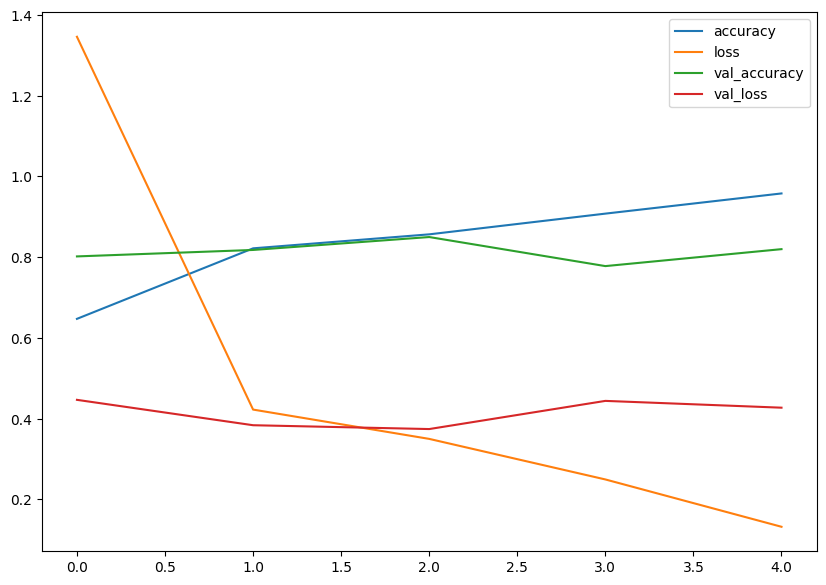

In [39]:
#Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [40]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

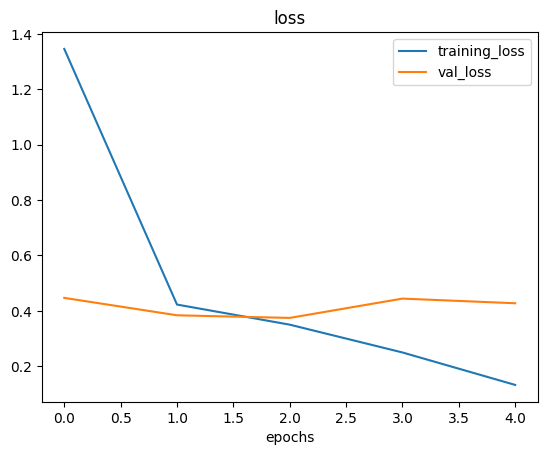

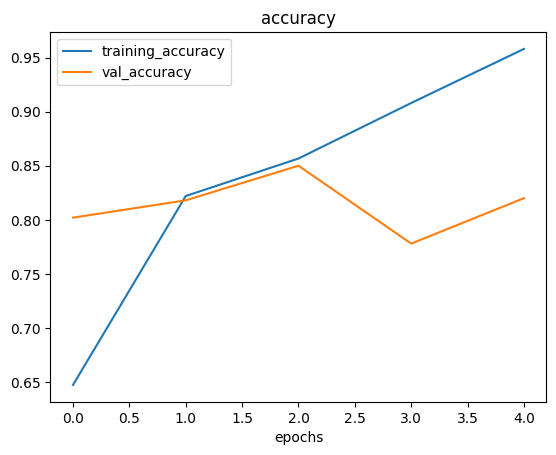

In [41]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

> 🔑**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences our model may be **overfitting.**

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [42]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.6227 - loss: 0.6582 - val_accuracy: 0.7720 - val_loss: 0.4992
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7449 - loss: 0.5120 - val_accuracy: 0.8440 - val_loss: 0.3944
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8307 - loss: 0.3977 - val_accuracy: 0.8440 - val_loss: 0.3804
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8163 - loss: 0.4000 - val_accuracy: 0.8180 - val_loss: 0.4009
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.8321 - loss: 0.3963 - val_accuracy: 0.8440 - val_loss: 0.3737


In [45]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

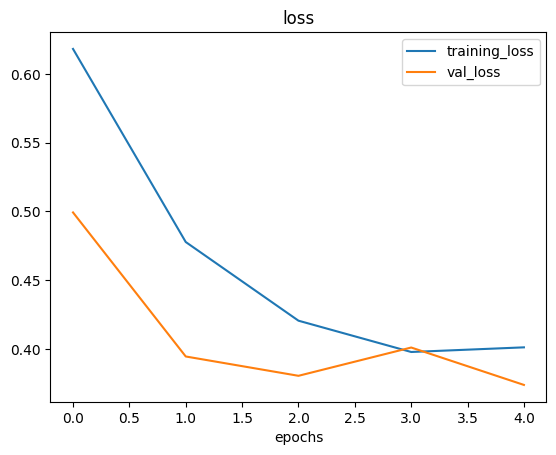

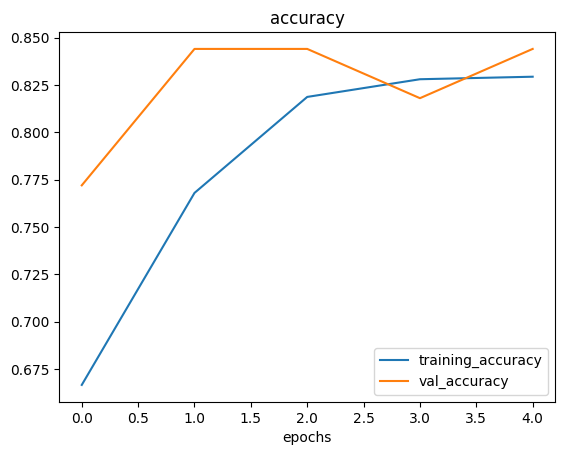

In [46]:
# Plot loss curves
plot_loss_curves(history_5)

>🔑**Note:** Reducing overfitting is also known as **regularization.**

### Opening our bag of tricks and finding data augmentation

In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?
**Classification:**Data augmentation is a technique used to artificially increase the size and diversity of a dataset by creating new data points from existing ones.

It is the process of altering our training data, leading it to have more diversity and in return allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it, or something similar.

In [48]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` build-in data augmentation parameters our images are left as they are in the directories but are modigied as they're loaded into the model.

Let's visualize some augmented data!

In [49]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # note: labels are not augmented.. data (images) are.


showing image number: 15


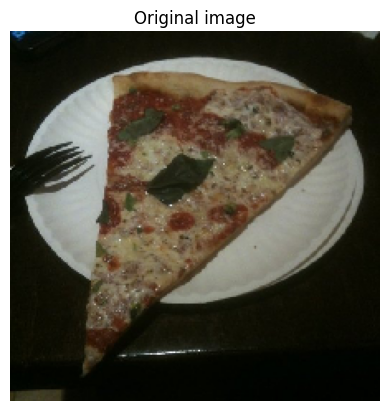

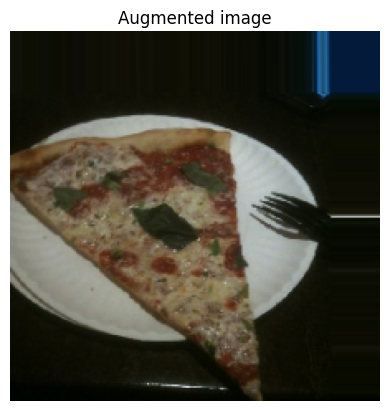

In [50]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32.
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Let's build a model and see how it learns from augmented training data.

In [51]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model : Fitting model_6 on augmented training data
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 461ms/step - accuracy: 0.4329 - loss: 0.7336 - val_accuracy: 0.5420 - val_loss: 0.6893
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 442ms/step - accuracy: 0.5418 - loss: 0.6944 - val_accuracy: 0.6360 - val_loss: 0.6911
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.6331 - loss: 0.6916 - val_accuracy: 0.6220 - val_loss: 0.6858
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 441ms/step - accuracy: 0.5435 - loss: 0.6895 - val_accuracy: 0.5700 - val_loss: 0.6779
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 415ms/step - accuracy: 0.6245 - loss: 0.6736 - val_accuracy: 0.6580 - val_loss: 0.6572


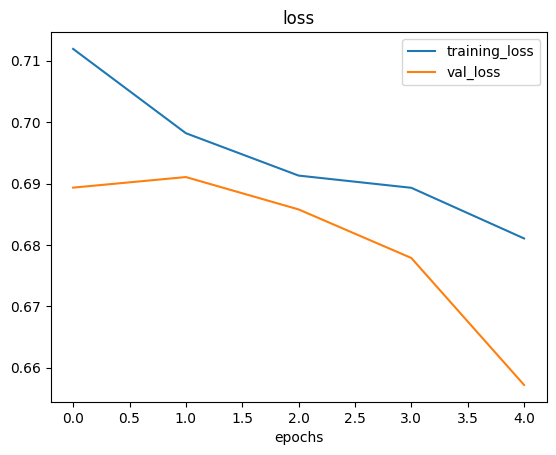

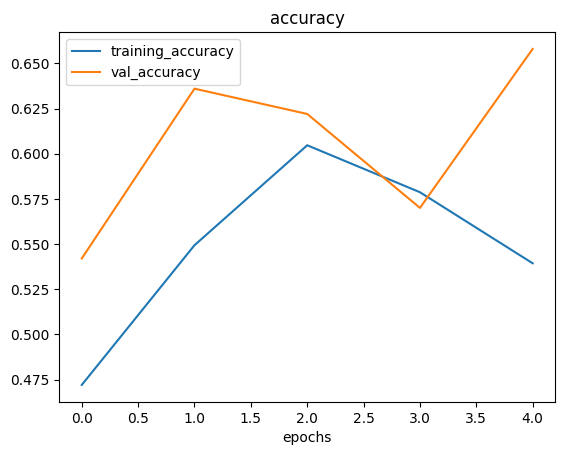

In [52]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before)

In [53]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [54]:
# Create the model (same as model_5, and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 433ms/step - accuracy: 0.5319 - loss: 0.6842 - val_accuracy: 0.6980 - val_loss: 0.5415
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.7194 - loss: 0.5602 - val_accuracy: 0.8320 - val_loss: 0.3913
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.7392 - loss: 0.5260 - val_accuracy: 0.8460 - val_loss: 0.3795
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.7538 - loss: 0.4888 - val_accuracy: 0.8360 - val_loss: 0.3663
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 435ms/step - accuracy: 0.7923 - loss: 0.4465 - val_accuracy: 0.7860 - val_loss: 0.4438


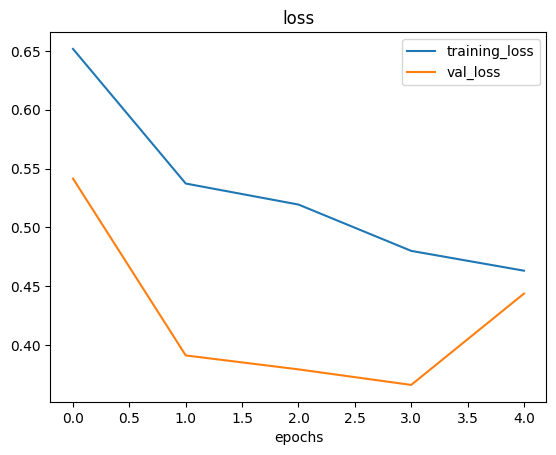

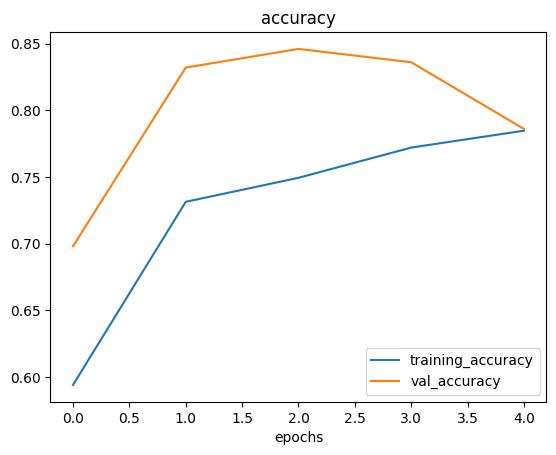

In [55]:
# Plot the loss curves
plot_loss_curves(history_7)

> 🔑**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data

In [56]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2025-05-03 13:17:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-05-03 13:17:16 (36.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

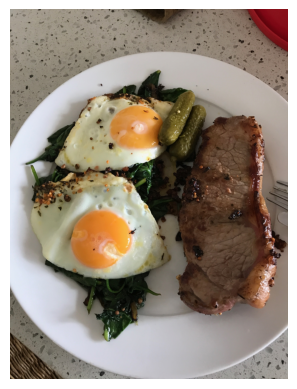

In [57]:
# View our example image
import matplotlib.image as imread
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [58]:
# Check the shape of the image
steak.shape

(4032, 3024, 3)

In [59]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

> 🔑**Note:** When we are train a neural network and we want to make a prediction with it on our own custom data, it's important that our custom data (or new data) is preprocessed into the same format as the data our model was trained on.

In [60]:
# Create a function to import and image and resize it to be able to be used in our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [61]:
# Load in and preprocess our custom image
steak = load_and_prep_image(filename="03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [62]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


array([[0.971791]], dtype=float32)

The custom image is being put through our model. However, it currently outputs a prediction probability. Let's visualize the image as well as the model's prediction.

In [63]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [64]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names.
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [65]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the prediction class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


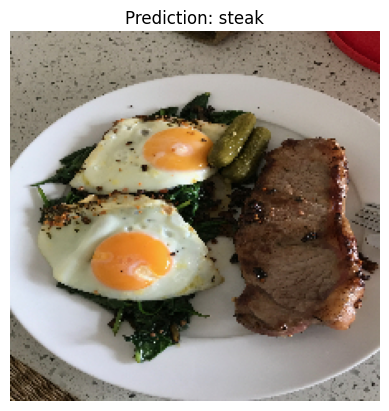

In [66]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image.

--2025-05-03 13:17:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-05-03 13:17:19 (53.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


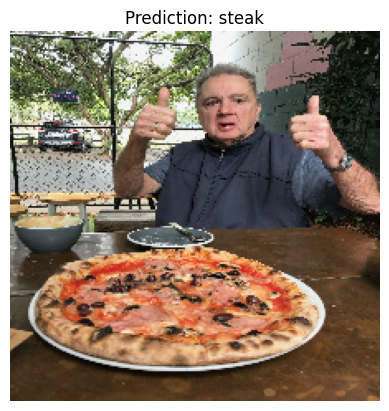

In [67]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We're going to experiment multi-class classification with 10 classes of food. And going to follow bellow steps to create a multi-class classification prediction model.

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data.

In [68]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-05-03 13:17:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   231MB/s    in 2.1s    

2025-05-03 13:17:21 (231 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [69]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [70]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 May  3 13:17 .
drwxr-xr-x  1 root root 4096 May  3 13:17 ..
drwxr-xr-x 12 root root 4096 May  3 13:17 test
drwxr-xr-x 12 root root 4096 May  3 13:17 train


In [71]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [72]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['355715.jpg']
Image shape: (382, 512, 3)


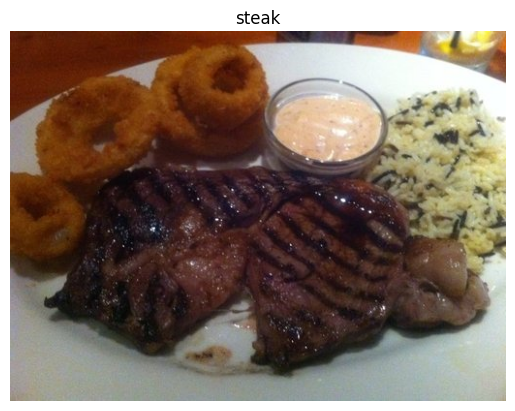

In [73]:
# Visualize data
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (get it ready for a model)

In [74]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [75]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [76]:
# Get a sample of a train data batch
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [77]:
# Number of batches
len(train_data)

235

In [79]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.6       , 0.63529414, 0.6627451 ],
          [0.58431375, 0.6117647 , 0.6431373 ],
          [0.45882356, 0.46274513, 0.48235297],
          ...,
          [0.30588236, 0.11764707, 0.02745098],
          [0.2509804 , 0.07058824, 0.        ],
          [0.30588236, 0.12941177, 0.03921569]],
 
         [[0.57254905, 0.6117647 , 0.64705884],
          [0.54901963, 0.58431375, 0.6117647 ],
          [0.45098042, 0.46274513, 0.4901961 ],
          ...,
          [0.28627452, 0.09803922, 0.00784314],
          [0.2509804 , 0.07058824, 0.        ],
          [0.31764707, 0.14117648, 0.0509804 ]],
 
         [[0.56078434, 0.6       , 0.63529414],
          [0.5647059 , 0.6       , 0.627451  ],
          [0.5019608 , 0.52156866, 0.54509807],
          ...,
          [0.27450982, 0.08627451, 0.        ],
          [0.2627451 , 0.08235294, 0.        ],
          [0.32941177, 0.15686275, 0.05882353]],
 
         ...,
 
         [[0.5647059 , 0.18039216, 0.        ],
          [0.57647

In [80]:
images[15]

array([[[0.23137257, 0.16862746, 0.07058824],
        [0.29411766, 0.227451  , 0.11764707],
        [0.32941177, 0.27058825, 0.18039216],
        ...,
        [0.5058824 , 0.4431373 , 0.38431376],
        [0.5137255 , 0.5137255 , 0.5137255 ],
        [0.60784316, 0.70980394, 0.8000001 ]],

       [[0.24313727, 0.18039216, 0.09019608],
        [0.3254902 , 0.25882354, 0.14901961],
        [0.38823533, 0.3254902 , 0.227451  ],
        ...,
        [0.5254902 , 0.5254902 , 0.5568628 ],
        [0.6039216 , 0.6745098 , 0.7686275 ],
        [0.7058824 , 0.8000001 , 0.9333334 ]],

       [[0.21568629, 0.15294118, 0.0627451 ],
        [0.28235295, 0.20392159, 0.10588236],
        [0.34901962, 0.28235295, 0.18039216],
        ...,
        [0.5882353 , 0.65882355, 0.7372549 ],
        [0.7058824 , 0.82745105, 0.94117653],
        [0.7960785 , 0.8980393 , 0.9960785 ]],

       ...,

       [[0.5647059 , 0.5137255 , 0.44705886],
        [0.5647059 , 0.5137255 , 0.44705886],
        [0.5686275 , 0

In [81]:
images[15].shape

(224, 224, 3)

In [82]:
# View the first batch of labels
labels

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

## 3. Create a model (start with a baseline)